In [167]:
%matplotlib inline

# Bloque 6.

# Series Temporales

Las series temporales son muestras de valores tomadas a lo largo de un tiempo con un muestro generalmente equidistante. Por ejemplo, información económica, demografía, meteorologica, registros de seguridad, de actividad, etc.

La librería Pandas gestiona las series temporales usando el indice: una fecha (datetime)

El indice de un dataframe es el pilar básico de acceso a los valores, por lo cual su uso simplifica procesos de filtrado, selección, interpolación, etc.


Enlace a la documentación: <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/timeseries.html">TimeSeries</a> 


## Objetivo del bloque

- Consolidar la gestión de los índices de dataframes y series 
- Manipular y transformar series temporales
- Visualizar series temporales

### Datos

Usaremos varios ejemplos disponibles en la carpeta data/

#### Recordad:

La linea que contenga #** es una lista que debereís completar 


# Preparemos el ejemplo

In [168]:
#Cargamos el fichero de climaMallorca
import pandas as pd
df= pd.read_csv("data/climaMallorca.csv")  #**
print df[:10] #**
print "Número total de muestras: ",len(df)

   Unnamed: 0      idDate  wind  temperature_mean
0           0  2015/11/28   4.0              12.0
1           1  2015/11/29   3.0              12.0
2           2  2012/06/19  10.0              27.0
3           3  2015/11/20   6.0              14.0
4           4  2015/11/21  22.0              15.0
5           5  2015/11/22   7.0              10.0
6           6  2015/11/23  12.0               8.0
7           7  2015/11/24   6.0               8.0
8           8  2015/11/25   8.0               9.0
9           9  2015/11/26  18.0              14.0
Número total de muestras:  2801


# y ¿Qué información contiene este dataframe?

In [169]:
#SABEMOS analizar rapidamente que datos hay con:
df.describe() #**

,Unnamed: 0,wind,temperature_mean
count,2801.000000,2801.000000,2801.000000
mean,1400.000000,8.111746,17.298108
std,808.723377,4.975943,8.193379
min,0.000000,0.000000,2.000000
25%,700.000000,5.000000,12.000000
50%,1400.000000,7.000000,16.000000
75%,2100.000000,10.000000,22.000000
max,2800.000000,43.000000,82.000000


In [170]:
print df.wind[:10] #mostramos los primeros 10 registros #**

0     4.0
1     3.0
2    10.0
3     6.0
4    22.0
5     7.0
6    12.0
7     6.0
8     8.0
9    18.0
Name: wind, dtype: float64


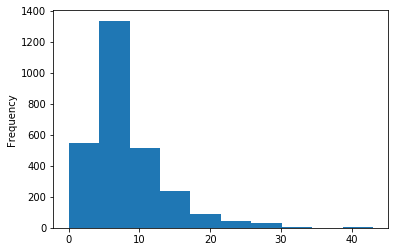

In [171]:
#E incluso podemos visualizar la distribución de los mismos
df.wind.plot(kind="hist") #**

In [172]:
print df.wind.mean() #** Calculamos el viento medio de todos los registros
print df.wind[10].mean() # el viento medio de los diez primeros registros

#Alerta!!! Los registros suelen estar ordenados según la secuencia del fichero CSV pero no tiene porque existir una secuencia temporal


8.11174580507
17.0


AxesSubplot(0.125,0.125;0.775x0.755)
22      53.0
47      63.0
60      78.0
186     71.0
411     64.0
422     64.0
713     82.0
854     70.0
886     64.0
893     76.0
1048    73.0
1139    66.0
1285    53.0
1293    52.0
1307    78.0
1323    72.0
1324    67.0
1326    60.0
1367    53.0
1475    54.0
1530    73.0
1546    63.0
1596    78.0
1801    76.0
1839    78.0
1840    79.0
1855    78.0
2084    56.0
2211    73.0
2285    54.0
2364    80.0
2407    82.0
Name: temperature_mean, dtype: float64


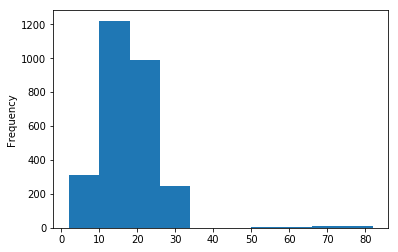

In [173]:
#Lo mismo con otras columnas/series
print df.temperature_mean.plot(kind="hist")
#He incluso podemos detectar valores posiblemente anómalos: Grados por encima de 50º ?????
print df.temperature_mean[df.temperature_mean>50]

# Pero... ¿Cómo podría sacar la temperatura media de un año?¿o la temperatura más alta de todos los meses de julio?

## Podemos convertirla en una serie temporal

## Nuestros dataframes suelen tener un índice, en este caso es númerico. 

In [174]:
print ("Indices",df.index)

('Indices', RangeIndex(start=0, stop=2801, step=1))


In [175]:
#En el fondo es "todo igual" una lista de cosas
print range(0,10,1) #Esto genera una lista de enteros
print pd.RangeIndex(0,6,1) #Esto genera una lista de indices
print ("Datos de la serie:")
for x in pd.RangeIndex(0,6,1):
    print x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RangeIndex(start=0, stop=6, step=1)
Datos de la serie:
0
1
2
3
4
5


## Asignamos al indice una lista de tiempos!

In [176]:
#¿Qué tipo de información debemos de asignar al indice para tener una serie temporal?
from pandas import DatetimeIndex
print df["idDate"]

print type(df["idDate"][0])

df.index = DatetimeIndex(df["idDate"]) #ALERTA!!! El índice es una serie por lo que podemos modificar sus valores. 

print df.index

0       2015/11/28
1       2015/11/29
2       2012/06/19
3       2015/11/20
4       2015/11/21
5       2015/11/22
6       2015/11/23
7       2015/11/24
8       2015/11/25
9       2015/11/26
10      2015/11/27
11      2013/10/25
12      2013/10/24
13      2013/10/27
14      2013/10/26
15      2013/10/21
16      2013/10/20
17      2013/10/23
18      2013/10/22
19      2007/05/19
20      2013/10/29
21      2013/10/28
22      2012/10/28
23      2012/10/29
24      2011/06/17
25      2012/10/20
26      2012/10/21
27      2012/10/22
28      2012/10/23
29      2012/10/24
           ...    
2771    2009/09/24
2772    2009/07/18
2773    2012/10/19
2774    2009/07/12
2775    2009/07/14
2776    2009/07/17
2777    2015/10/13
2778    2008/05/05
2779    2009/09/25
2780    2008/05/06
2781    2008/05/01
2782    2009/08/06
2783    2008/05/03
2784    2009/08/09
2785    2009/08/08
2786    2007/03/09
2787    2009/01/12
2788    2009/01/11
2789    2009/01/10
2790    2009/01/17
2791    2009/01/16
2792    2009

In [177]:
#Ahora nuestro datraframe(.index) es una serie temporal!
#y por ejemplo, la selección de datos (filas) se SIMPLIFICA enormemente
#Primer caso: podemos seleccionar muestras por años
print df["2015"][:10] #seleccionamos las 10 primeras muestras de un año #**
print df["2015"].wind[8:18] #seleccionamos las 8º-17º primeras muestras de una serie de un año #**

            Unnamed: 0      idDate  wind  temperature_mean
idDate                                                    
2015-11-28           0  2015/11/28   4.0              12.0
2015-11-29           1  2015/11/29   3.0              12.0
2015-11-20           3  2015/11/20   6.0              14.0
2015-11-21           4  2015/11/21  22.0              15.0
2015-11-22           5  2015/11/22   7.0              10.0
2015-11-23           6  2015/11/23  12.0               8.0
2015-11-24           7  2015/11/24   6.0               8.0
2015-11-25           8  2015/11/25   8.0               9.0
2015-11-26           9  2015/11/26  18.0              14.0
2015-11-27          10  2015/11/27  17.0              12.0
idDate
2015-11-26    18.0
2015-11-27    17.0
2015-10-09     6.0
2015-10-08     7.0
2015-10-05    11.0
2015-10-04     6.0
2015-10-07     7.0
2015-10-06    15.0
2015-10-01     8.0
2015-10-03     5.0
Name: wind, dtype: float64


In [178]:
#Ahora con meses...
print df["01/2015"].describe()
print "-"*50
print df["01/2006":"01/2007"].wind.describe()

        Unnamed: 0       wind  temperature_mean
count    31.000000  31.000000         31.000000
mean    850.903226   6.516129          9.290323
std     202.153301   5.926612          1.716460
min     460.000000   1.000000          6.000000
25%     676.500000   3.000000          8.000000
50%     908.000000   5.000000          9.000000
75%     915.500000   7.000000         10.000000
max    1165.000000  27.000000         14.000000
--------------------------------------------------
count    64.000000
mean      8.406250
std       4.370604
min       3.000000
25%       5.750000
50%       7.000000
75%      10.000000
max      23.000000
Name: wind, dtype: float64


In [179]:
#Por tanto, se simplifica las operaciones útiles sobre los datos
print "Viento medio en 2015 sobre Mallorca: %f" %df["2015"].wind.mean()
print "Viento medio en 2014 sobre Mallorca: %f" %df["2014"].wind.mean()

Viento medio en 2015 sobre Mallorca: 7.586301
Viento medio en 2014 sobre Mallorca: 8.123288


In [180]:
### Podemos intentar mostrar el viento medio de cada año haciendo esto:
yearMax = df.index.max().year
print "Max. year: ",yearMax
yearMin = df.index.min().year
print "Min. year: ",yearMin
print range(yearMin,yearMax)

Max. year:  2016
Min. year:  2005
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [181]:
viento =[]
for year in range(yearMin,yearMax):
    print "Viento medio en %i sobre Mallorca: %f" %(year,df[str(year)].wind.mean())
    viento.append(df[str(year)].wind.mean())
    
print viento

Viento medio en 2005 sobre Mallorca: 8.666667
Viento medio en 2006 sobre Mallorca: 8.400000
Viento medio en 2007 sobre Mallorca: 9.078652
Viento medio en 2008 sobre Mallorca: 8.859756
Viento medio en 2009 sobre Mallorca: 7.941634
Viento medio en 2010 sobre Mallorca: 7.611842
Viento medio en 2011 sobre Mallorca: 7.471429
Viento medio en 2012 sobre Mallorca: 7.980822
Viento medio en 2013 sobre Mallorca: 8.726027
Viento medio en 2014 sobre Mallorca: 8.123288
Viento medio en 2015 sobre Mallorca: 7.586301
[8.666666666666666, 8.4, 9.07865168539326, 8.859756097560975, 7.941634241245136, 7.6118421052631575, 7.4714285714285715, 7.980821917808219, 8.726027397260275, 8.123287671232877, 7.586301369863014]


In [182]:
# O lo mismo, pero más sencillo: agrupando por años!
year_wind = df.groupby(df.index.year).mean()["wind"] #**
print year_wind

idDate
2005    8.666667
2006    8.400000
2007    9.078652
2008    8.859756
2009    7.941634
2010    7.611842
2011    7.471429
2012    7.980822
2013    8.726027
2014    8.123288
2015    7.586301
2016    9.831933
Name: wind, dtype: float64


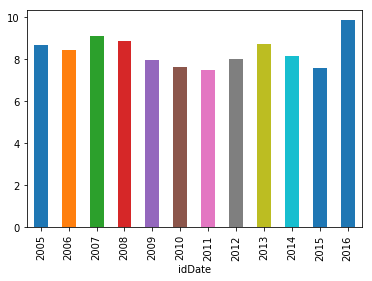

In [183]:
year_wind.plot(kind="bar")

In [184]:
# Podemos averiguar relaciones entre años: ¿Hizo más viento de media en 2015 que en 2012?
df["2015"].mean()["wind"]>df["2012"].mean()["wind"]

False

## Para realizar análisis más rigurosos necesitamos comprender como trata Pandas las series de tiempo. 
- Transformar series temporales
- Completar o rellenar con valores 
- Crear series temporales sobre valores sin marcas de tiempo


In [185]:
print df.index[:10] # Nuestro indice está formado por una lista de fechas

DatetimeIndex(['2015-11-28', '2015-11-29', '2012-06-19', '2015-11-20',
               '2015-11-21', '2015-11-22', '2015-11-23', '2015-11-24',
               '2015-11-25', '2015-11-26'],
              dtype='datetime64[ns]', name=u'idDate', freq=None)


### Las fechas tienen COMPONENTES

In [205]:
value = df.index[0]
print value
print value.year
print value.day
print value.is_quarter_start
print value.second
print value.microsecond

2015-11-28 00:00:00
2015
28
False
0
0


#### Componentes

<img src="files/timecomponentes.png">

### y son listas! Al igual que podemos crear listas númericas, también podemos crear listas de tiempos: 

In [186]:
print "A: ",range(1,10)
print "B: ",range(1,10,2)

import numpy as np
print "C: ",np.random.randint(5, size=(2, 4))

index = pd.date_range('2000-1-1', periods=13, freq='M')
print "TIEMPO:", index

A:  [1, 2, 3, 4, 5, 6, 7, 8, 9]
B:  [1, 3, 5, 7, 9]
C:  [[0 4 4 3]
 [0 4 3 0]]
TIEMPO: DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31',
               '2001-01-31'],
              dtype='datetime64[ns]', freq='M')


### La frecuencia nos permite definir el periodo de tiempo 
## Tipos de frecuencia predefinidos

- B       business day frequency
- C       custom business day frequency (experimental)
- D       calendar day frequency
- W       weekly frequency
- M       month end frequency
- BM      business month end frequency
- CBM     custom business month end frequency
- MS      month start frequency
- BMS     business month start frequency
- CBMS    custom business month start frequency
- Q       quarter end frequency
- BQ      business quarter endfrequency
- QS      quarter start frequency
- BQS     business quarter start frequency
- A       year end frequency
- BA      business year end frequency
- AS      year start frequency
- BAS     business year start frequency
- BH      business hour frequency
- H       hourly frequency
- T       minutely frequency
- S       secondly frequency
- L       milliseonds
- U       microseconds
- N       nanoseconds


In [187]:
index = pd.date_range('2000-1-1', periods=5, freq='MS')
print index
index = pd.date_range('2000-1-1', periods=5, freq='BM')
print index
index = pd.date_range('2000-1-1', periods=5, freq="2H30T")
print index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01'],
              dtype='datetime64[ns]', freq='MS')
DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31'],
              dtype='datetime64[ns]', freq='BM')
DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 02:30:00',
               '2000-01-01 05:00:00', '2000-01-01 07:30:00',
               '2000-01-01 10:00:00'],
              dtype='datetime64[ns]', freq='150T')


### Sobre las fechas podemos realizar operaciones
- Sumas y diferencias de fechas sobre fechas


In [189]:
from pandas.tseries.offsets import * #En esta librería tenemos offsets predefinidos 
dia = pd.datetime(2017,7,17,10,30)
print dia
print dia + Day()
print dia + Minute(59)
print dia - Day(30)
dia.month


2017-07-17 10:30:00
2017-07-18 10:30:00
2017-07-17 11:29:00
2017-06-17 10:30:00


7

In [190]:
#O podemos combinarlo de una manera más genérica, através de su declaración
print dia + DateOffset(months=1, days=5)

2017-08-22 10:30:00


<img src="files/offsets.png">

In [191]:
#Y al igual que podemos operar un escalar sobre una serie de valores, podemos operar un offset sobre una serie temporal
index = pd.date_range('2000-1-1', periods=10, freq='MS')
print index
print index+DateOffset(months=1) 


DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01'],
              dtype='datetime64[ns]', freq='MS')
DatetimeIndex(['2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
               '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01',
               '2000-10-01', '2000-11-01'],
              dtype='datetime64[ns]', freq='MS')


# Resampling

Imaginad que sobre un subconjunto de muestras podemos aplicar operaciones de agregación.

Por ejemplo, ¿cuánto dinero hay disponible en un determinado periodo de tiempo?

Pandas ofrece la capacidad de "agrupar" las muestras en otros periodos de tiempo mediante la operación de resampling

In [192]:
index = pd.date_range('2000-1-1', periods=3600, freq='S')
print index[:10]

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:00:01',
               '2000-01-01 00:00:02', '2000-01-01 00:00:03',
               '2000-01-01 00:00:04', '2000-01-01 00:00:05',
               '2000-01-01 00:00:06', '2000-01-01 00:00:07',
               '2000-01-01 00:00:08', '2000-01-01 00:00:09'],
              dtype='datetime64[ns]', freq='S')


In [193]:
# Creamos una serie de valores aleatorios entre (0,500) de tantas muestras como registros temporales 
ts = pd.Series(np.random.randint(0, 500, len(index_dump)), index=index_dump)
print ts[:10] #**

2000-01-01 00:00:00    113
2000-01-01 00:00:01     78
2000-01-01 00:00:02    364
2000-01-01 00:00:03    412
2000-01-01 00:00:04    281
2000-01-01 00:00:05    491
2000-01-01 00:00:06    125
2000-01-01 00:00:07    201
2000-01-01 00:00:08    170
2000-01-01 00:00:09     44
Freq: S, dtype: int64


In [194]:
# Agrupamos las anteriores muestras en 1 Minuto !
ts.resample('1Min').sum()

2000-01-01 00:00:00    14306
2000-01-01 00:01:00    14608
2000-01-01 00:02:00    14839
2000-01-01 00:03:00    15858
2000-01-01 00:04:00    15994
2000-01-01 00:05:00    14266
2000-01-01 00:06:00    16791
2000-01-01 00:07:00    15743
2000-01-01 00:08:00    16205
2000-01-01 00:09:00    16509
2000-01-01 00:10:00    15531
2000-01-01 00:11:00    14237
2000-01-01 00:12:00    15547
2000-01-01 00:13:00    14679
2000-01-01 00:14:00    13632
2000-01-01 00:15:00    14475
2000-01-01 00:16:00    14062
2000-01-01 00:17:00    13239
2000-01-01 00:18:00    14956
2000-01-01 00:19:00    13136
2000-01-01 00:20:00    14952
2000-01-01 00:21:00    15222
2000-01-01 00:22:00    14816
2000-01-01 00:23:00    15151
2000-01-01 00:24:00    14694
2000-01-01 00:25:00    15287
2000-01-01 00:26:00    17154
2000-01-01 00:27:00    13125
2000-01-01 00:28:00    15515
2000-01-01 00:29:00    14201
2000-01-01 00:30:00    14723
2000-01-01 00:31:00    13046
2000-01-01 00:32:00    15633
2000-01-01 00:33:00    13492
2000-01-01 00:

In [195]:
ts.resample('1Min').max()

2000-01-01 00:00:00    498
2000-01-01 00:01:00    496
2000-01-01 00:02:00    481
2000-01-01 00:03:00    492
2000-01-01 00:04:00    499
2000-01-01 00:05:00    498
2000-01-01 00:06:00    495
2000-01-01 00:07:00    486
2000-01-01 00:08:00    495
2000-01-01 00:09:00    497
2000-01-01 00:10:00    499
2000-01-01 00:11:00    480
2000-01-01 00:12:00    495
2000-01-01 00:13:00    481
2000-01-01 00:14:00    487
2000-01-01 00:15:00    498
2000-01-01 00:16:00    486
2000-01-01 00:17:00    468
2000-01-01 00:18:00    486
2000-01-01 00:19:00    492
2000-01-01 00:20:00    481
2000-01-01 00:21:00    492
2000-01-01 00:22:00    484
2000-01-01 00:23:00    496
2000-01-01 00:24:00    490
2000-01-01 00:25:00    486
2000-01-01 00:26:00    487
2000-01-01 00:27:00    498
2000-01-01 00:28:00    495
2000-01-01 00:29:00    498
2000-01-01 00:30:00    496
2000-01-01 00:31:00    495
2000-01-01 00:32:00    498
2000-01-01 00:33:00    497
2000-01-01 00:34:00    493
2000-01-01 00:35:00    476
2000-01-01 00:36:00    481
2

### El resampling puede realizarse con frequencias INEXISTENTES.



In [196]:
ts[:4].resample('250L').asfreq() # 250 Milisegundos   

2000-01-01 00:00:00.000    113.0
2000-01-01 00:00:00.250      NaN
2000-01-01 00:00:00.500      NaN
2000-01-01 00:00:00.750      NaN
2000-01-01 00:00:01.000     78.0
2000-01-01 00:00:01.250      NaN
2000-01-01 00:00:01.500      NaN
2000-01-01 00:00:01.750      NaN
2000-01-01 00:00:02.000    364.0
2000-01-01 00:00:02.250      NaN
2000-01-01 00:00:02.500      NaN
2000-01-01 00:00:02.750      NaN
2000-01-01 00:00:03.000    412.0
Freq: 250L, dtype: float64

**Nota** La magnitud es el *Tipo de Frecuencia*

In [197]:
#Incluso podemos rellenar valores según algún criterio

print ts[:4].resample('250L').ffill()  # 250 Milisegundos (values forward)
print ts[:4].resample('250L').bfill()  # 250 Milisegundos (values backward)



2000-01-01 00:00:00.000    113
2000-01-01 00:00:00.250    113
2000-01-01 00:00:00.500    113
2000-01-01 00:00:00.750    113
2000-01-01 00:00:01.000     78
2000-01-01 00:00:01.250     78
2000-01-01 00:00:01.500     78
2000-01-01 00:00:01.750     78
2000-01-01 00:00:02.000    364
2000-01-01 00:00:02.250    364
2000-01-01 00:00:02.500    364
2000-01-01 00:00:02.750    364
2000-01-01 00:00:03.000    412
Freq: 250L, dtype: int64
2000-01-01 00:00:00.000    113
2000-01-01 00:00:00.250     78
2000-01-01 00:00:00.500     78
2000-01-01 00:00:00.750     78
2000-01-01 00:00:01.000     78
2000-01-01 00:00:01.250    364
2000-01-01 00:00:01.500    364
2000-01-01 00:00:01.750    364
2000-01-01 00:00:02.000    364
2000-01-01 00:00:02.250    412
2000-01-01 00:00:02.500    412
2000-01-01 00:00:02.750    412
2000-01-01 00:00:03.000    412
Freq: 250L, dtype: int64


In [206]:
# Expliquemos la operación FILL de otra manera
from pandas import Series
caso = Series(['A','B','C'],index = [0,5,10])
print caso
print caso.reindex(ranger,method = 'ffill')

0     A
5     B
10    C
dtype: object
0     A
1     A
2     A
3     A
4     A
5     B
6     B
7     B
8     B
9     B
10    C
11    C
12    C
13    C
14    C
dtype: object


# Vamos a juntar todo lo que hemos estado viendo...

Text(0.5,1,'Temperature sampling in the Balearic Islands')

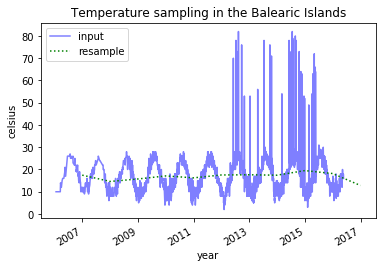

In [199]:
import matplotlib.pyplot as plt

df= pd.read_csv("data/climaMallorca.csv")  
df.index = DatetimeIndex(df["idDate"])
temperature = df["temperature_mean"]["2006":"2016"]

temperature.plot(alpha=0.5, style='-',color="blue")
temperature.resample('BA').mean().plot(style=':',color="green") #BA - Bussiness year
          
plt.legend(['input', 'resample'],loc='upper left');
plt.xlabel('year')
plt.ylabel('celsius')
plt.title('Temperature sampling in the Balearic Islands')

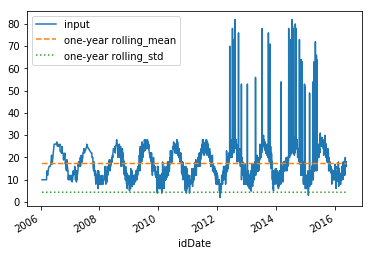

In [218]:
# Sobre series temporales: medias moviles > Rolling operations
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html
# https://en.wikipedia.org/wiki/Window_function
df= pd.read_csv("data/climaMallorca.csv")  
df.index = DatetimeIndex(df["idDate"])
temperature = df["temperature_mean"]["2006":"2016"]

rolling = temperature.rolling(window=10)

data = pd.DataFrame({'input': temperature,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])


In [201]:
df.resample("12M").agg({"wind":np.mean,"temperature_mean":np.min})

,temperature_mean,wind
idDate,,
2005-06-30,25.0,14.000000
2006-06-30,10.0,7.684211
2007-06-30,9.0,9.440860
2008-06-30,6.0,8.105769
2009-06-30,5.0,8.932127
2010-06-30,4.0,7.602888
2011-06-30,4.0,7.453988
2012-06-30,2.0,7.453039
2013-06-30,5.0,9.241096


In [202]:
df.resample("12M")["wind"].agg([np.mean,np.min,np.max])

,mean,amin,amax
idDate,,,
2005-06-30,14.000000,14.0,14.0
2006-06-30,7.684211,4.0,17.0
2007-06-30,9.440860,3.0,32.0
2008-06-30,8.105769,3.0,28.0
2009-06-30,8.932127,3.0,43.0
2010-06-30,7.602888,1.0,39.0
2011-06-30,7.453988,1.0,28.0
2012-06-30,7.453039,0.0,30.0
2013-06-30,9.241096,2.0,32.0


In [209]:
weekly = df.resample('W').sum()
print weekly

            Unnamed: 0   wind  temperature_mean
idDate                                         
2005-06-19        1246   14.0              25.0
2005-06-26           0    0.0               0.0
2005-07-03           0    0.0               0.0
2005-07-10           0    0.0               0.0
2005-07-17           0    0.0               0.0
2005-07-24           0    0.0               0.0
2005-07-31           0    0.0               0.0
2005-08-07           0    0.0               0.0
2005-08-14           0    0.0               0.0
2005-08-21           0    0.0               0.0
2005-08-28           0    0.0               0.0
2005-09-04           0    0.0               0.0
2005-09-11           0    0.0               0.0
2005-09-18           0    0.0               0.0
2005-09-25        2477    6.0              17.0
2005-10-02           0    0.0               0.0
2005-10-09           0    0.0               0.0
2005-10-16           0    0.0               0.0
2005-10-23           0    0.0           

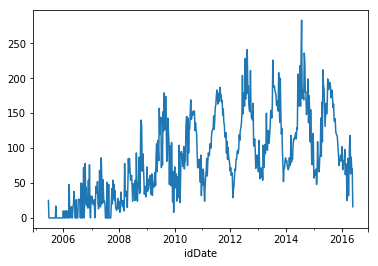

In [208]:
weekly.temperature_mean.plot()

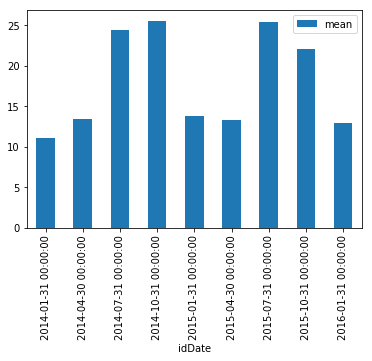

In [204]:
df["2014":"2015"].resample("3M")["temperature_mean"].agg([np.mean]).plot(kind="bar")

# Ejercicios

### 1 Crea una serie temporal, donde figure el primer día de cada mes, durante 2 años.


### 2 Genera una serie temporal donde haya una muestra cada 15 ms durante 2 horas.


### Ejercicios con el fichero del "rdu-weather-history.csv" 

#### 3 ¿Cuál es la temperatura mínima media de cada año (en Celsius)?  Formula: (32 °F − 32) × 5 / 9 = 0 °C


#### 4 ¿Qué año fue el más lluvisoso?

#### 5 ¿Cuántos días de “29/Febrero” hay en los datos de tiempo?

#### 6 ¿Muestra en una gráfica la profundidad media de la nieve?